In [3]:
import numpy as np
from src.predictor import PredictorCls
from utils.fcgUtils.plotutils import plot_self_attention_map

default_config = {
    'project':        'FcgFormer',
    'model':          'lycaoduong/FcgFormer',
    'ckpt':           None,
    'device':         'cpu',
    'input_path':     './dataset/test.npy',
    'threshold':      0.5,
    'plot_attention': False,
}

In [4]:
# load predictor
engine = PredictorCls(
    model_path=default_config['model'],
    device=default_config['device'],
    ckpt=default_config['ckpt']
)

Functional groups: ['methyl', 'alkene', 'alcohols', 'aromatics', 'carboxylic acids', 'ether']
Probabilities:     [0.9977794, 0.8825712, 0.9999901, 0.9999999, 0.9999964, 0.81813896]


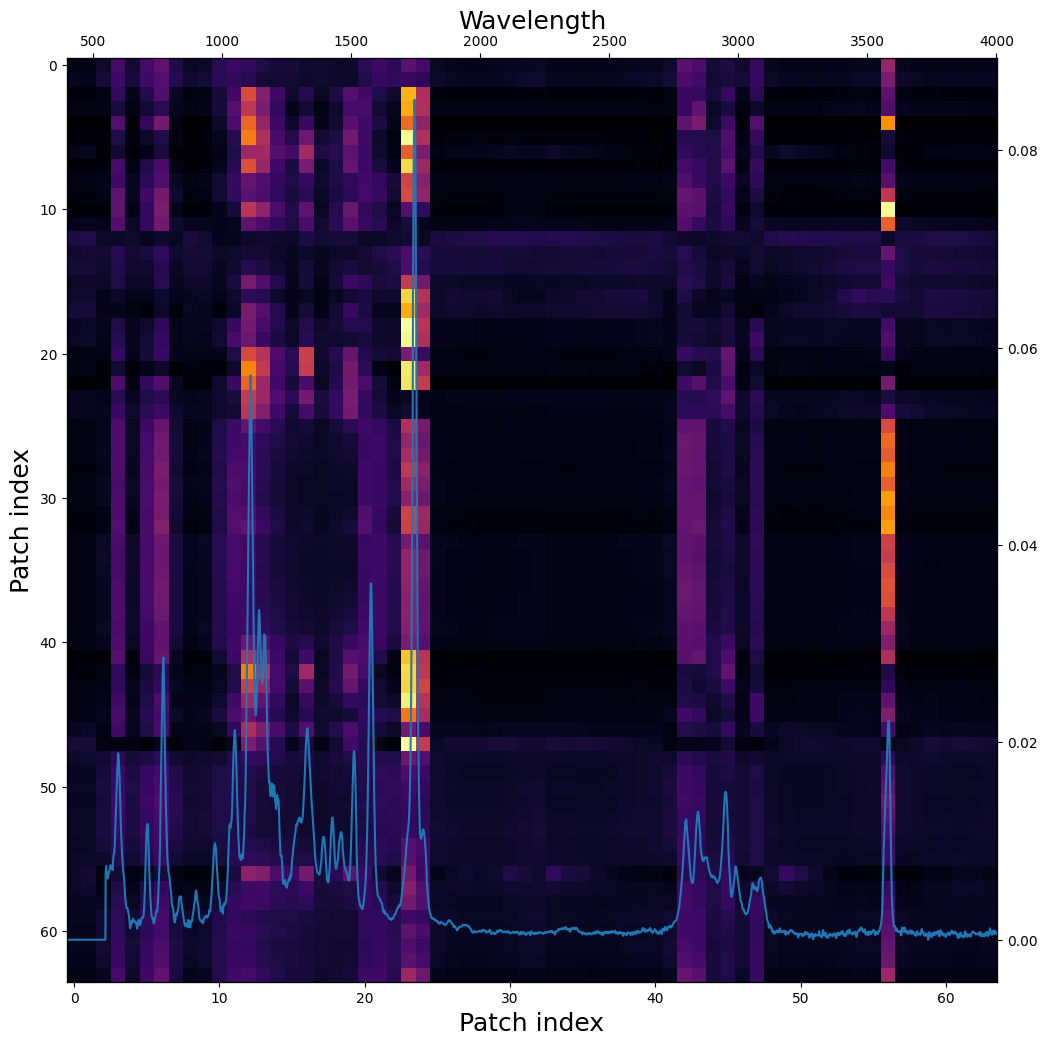

In [5]:
def predict(spectra_path=None, threshold=None, plot_attention=None, engine=engine):
    """
    Load spectra from `spectra_path`, run the PredictorCls engine,
    print & return (fcn_groups, probabilities), and optionally plot attention.
    Any argument left as None will fall back to default_config.
    """
    # resolve parameters
    path       = spectra_path    or default_config['input_path']
    th         = threshold       if threshold is not None else default_config['threshold']
    plot_att   = plot_attention  if plot_attention is not None else default_config['plot_attention']

    # run
    spectra    = np.load(path)
    outputs    = engine(spectra)
    fcn_groups, probabilities = engine.get_result(outputs, th=th, pos_only=True)

    # display
    print("Functional groups:", fcn_groups)
    print("Probabilities:    ", probabilities)

    if plot_att:
        att = engine.get_attention()
        plot_self_attention_map(spectra, att)

    return fcn_groups, probabilities

# e.g. run on a different file, with a higher threshold and plot attention
fcn_groups2, probs2 = predict(
    spectra_path='./dataset/test.npy',
    threshold=0.5,
    plot_attention=True
)

Functional groups: ['methyl', 'alkene', 'alcohols', 'aromatics', 'carboxylic acids', 'ether']
Probabilities:     [0.9977794, 0.8825716, 0.9999901, 0.9999999, 0.9999964, 0.81813896]
